# The Task
1) the goal of this project is to analyze nypd arrest data
2) pick any zip code/neighborhood/district in this dataset as an initial 
comparison point
3) pick a feature/measure/indicator
4) compare above group to any other (different) group  - you only need to do one additional group comparison (but you’re welcome to do more comparisons if you feel compelled to do so)
5) the analysis should include some descriptive statistics
6) the analysis should include one cleaning task (or more)
7) the analysis should include one visualization (or more)
8) the analysis should include a brief conclusion statement (not more than two or three sentences)
9) the analysis should include a comment how you think biases could have played a role from a data perspective


For my analysis, I would like to understand the number of arrests that took place for the first 9 months of 2023 YTD in New York related to misdemeanors and see how they compare by borough. 
I will look at the type of offenses to see which one drove the majority of the arrests. In addition, I will look at other variables, such as age group and ethnicity to understand whether any of the categories stand out.


In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Missing Values. Deal with non-standard missing values when loading the file.
missing_values = ["n/a","na","--","-","NaN"]
#Load the data file into a data frame.
df = pd.read_csv ('NYPD_Arrest_Data__Year_to_Date__20231219.csv',na_values = missing_values)

# Perform some Exploratory Data Analysis of the file loaded

In [3]:
#Show the first 10 rows of the data frame.
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,1/1/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,2/3/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,2/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,1/4/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,2/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
5,262030390,1/17/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,113,0,45-64,F,BLACK,1040264,190275,40.688762,-73.798020,POINT (-73.79802 40.688762)
6,262362214,1/23/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999439,236537,40.815904,-73.945123,POINT (-73.945123 40.815904)
7,264579718,3/4/2023,153,RAPE 3,104.0,RAPE,PL 1302503,F,K,67,0,<18,M,BLACK,997843,175671,40.648851,-73.951017,POINT (-73.951016510623 40.6488507469884)
8,262500981,1/25/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,M,14,0,45-64,M,BLACK,987078,215157,40.757232,-73.989792,POINT (-73.98979219 40.75723226)
9,265281035,3/17/2023,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402501,F,M,24,0,45-64,M,BLACK,992960,230413,40.799102,-73.968541,POINT (-73.96854103 40.79910212)


In [4]:
#Show the last 10 rows of the data frame.
df.tail(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
170085,273821910,9/2/2023,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,83,0,18-24,M,WHITE HISPANIC,1002760,193531,40.697855,-73.933247,POINT (-73.9332467142579 40.69785526209324)
170086,271871799,7/25/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,Q,109,0,25-44,M,WHITE HISPANIC,1040057,215751,40.758689,-73.798555,POINT (-73.798555 40.758689)
170087,273466659,8/26/2023,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL0511001,M,K,75,0,25-44,M,WHITE HISPANIC,1016039,188033,40.682727,-73.885384,POINT (-73.88538416047268 40.682726793434625)
170088,269968287,6/16/2023,478,"THEFT OF SERVICES, UNCLASSIFIE",343.0,OTHER OFFENSES RELATED TO THEF,PL 1651503,M,B,40,1,18-24,M,BLACK,1011485,237929,40.819694,-73.901602,POINT (-73.90160159 40.81969376)
170089,270409968,6/26/2023,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,14,17,25-44,M,WHITE,990513,213251,40.752001,-73.977392,POINT (-73.977392 40.752001)
170090,270955727,7/7/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,8/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,9/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,6/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)
170094,272045762,7/28/2023,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",113.0,FORGERY,PL 1702500,F,K,84,0,18-24,M,BLACK,988491,195163,40.702353,-73.984705,POINT (-73.98470449707197 40.70235306254946)


In [5]:
#The describe function shows a statistical summary of the columns containing numeric values. 
#All columns containing indexes, numeric codes or coordenates are not useful for statistical purposes.
#Other columns do not show any statistic because there are rows with strings.
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [6]:
#The data frame contains 170,095 rows by 19 columns.
df.shape

(170095, 19)

In [7]:
#Get the labels of the 19 columns.
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [8]:
#df.info() function is used to get a concise summary of the dataframe. 
#It helps with exploratory analysis of the data. It shows the name of the columns, count of non-nulls and data types.
#In comparison the df.types function would only provide a column with the labels and another column with the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

In [9]:
#To make sure ARREST_KEY index is unique and there are no duplicates.
df['ARREST_KEY'].is_unique

True

In [10]:
#See what unique values are populating PD_CD or Police Department Code. 
#Three digit internal classification code (more granular than Key Code)
df ['PD_CD'].unique()

array([109, 515, 105, 153, 729, 244, 263, 101, 397, 339, 157, 793, 293,
       637, 155, 661, 464, 177, 123, 707, 742, 261, 777, 223, 209, 113,
       922, 916, 115, 511, 175, 705, 905,  16, 478, 724, 490, 639, 969,
       419, 792, 268, 503, 439, 779, 808, 114, 563, 173, 557, 681, 505,
       203, 259, 596, 782, 750, 139, 269, 204, 479, 494, 594, 849, 199,
       117, 510, 507, 578, 493, 258, 847, 718, 544, 106, 198, 112, 461,
       548, 764, 104, 586, 576, 759, 799, 441, 273, 291, 514, 170, 409,
       501, 748, 502, 462, 878, 662, 508, 254, 744,  49, 848, 638, 649,
       440, 696, 256, 176, 500, 164, 665, 687, 760, 640, 205, 521, 918,
       579, 523, 940, 498, 701, 565, 739, 904, 180, 297, 197, 289, 168,
       879, 181, 466, 512, 301, 809, 939, 708, 862, 645, 475, 698, 827,
        15, 553, 574, 907, 725, 201, 802, 762, 803, 477, 968, 379, 271,
       625, 248, 711, 129, 520, 906, 844, 380, 275, 644, 775, 531,  35,
       185, 585, 107, 706, 581, 817, 183, 179, 532, 513, 125, 16

In [11]:
# Count the number of unique values in the column PD_CD. There are 255 unique values.
len(df['PD_CD'].unique())

255

In [12]:
#See what unique values are populating ARREST_DATE. 
df ['ARREST_DATE'].unique()

array(['1/1/2023', '2/3/2023', '2/15/2023', '1/4/2023', '2/13/2023',
       '1/17/2023', '1/23/2023', '3/4/2023', '1/25/2023', '3/17/2023',
       '1/30/2023', '2/2/2023', '2/9/2023', '4/4/2023', '3/3/2023',
       '4/13/2023', '4/25/2023', '3/16/2023', '2/18/2023', '3/21/2023',
       '5/4/2023', '5/3/2023', '2/26/2023', '5/18/2023', '4/21/2023',
       '4/23/2023', '5/5/2023', '6/14/2023', '6/18/2023', '5/16/2023',
       '4/19/2023', '5/23/2023', '7/5/2023', '7/10/2023', '5/1/2023',
       '5/2/2023', '6/8/2023', '5/20/2023', '7/2/2023', '7/4/2023',
       '6/3/2023', '8/25/2023', '6/24/2023', '9/3/2023', '6/20/2023',
       '9/14/2023', '7/19/2023', '8/2/2023', '9/16/2023', '8/29/2023',
       '8/30/2023', '9/11/2023', '2/22/2023', '4/22/2023', '5/25/2023',
       '1/13/2023', '1/19/2023', '7/17/2023', '2/5/2023', '7/31/2023',
       '1/10/2023', '3/14/2023', '8/17/2023', '3/7/2023', '4/3/2023',
       '3/15/2023', '4/10/2023', '2/16/2023', '4/29/2023', '3/6/2023',
       '5/14/202

In [13]:
# Count the number of unique values in the column ARREST_DATE. 
#There are 273 unique values from January 1st to September 30th.
len(df['ARREST_DATE'].unique())

273

In [14]:
#Convert the ARREST_DATE to date time format.
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [15]:
# Extract the month from the ARREST_DATE column and create a new column named 'month'.
#This would help to aggregate the days by month.
df['Month'] = df['ARREST_DATE'].dt.month

In [16]:
#Get the labels of the 19 columns.
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column',
       'Month'],
      dtype='object')

In [17]:
#See what unique values are populating PD_DESC. Description of internal classification corresponding with PD code 
#(more granular than Offense Description)
df ['PD_DESC'].unique()

array(['ASSAULT 2,1,UNCLASSIFIED', 'CONTROLLED SUBSTANCE,SALE 3',
       'STRANGULATION 1ST', 'RAPE 3', 'FORGERY,ETC.,UNCLASSIFIED-FELO',
       'BURGLARY,UNCLASSIFIED,UNKNOWN', 'ARSON 2,3,4', 'ASSAULT 3',
       'ROBBERY,OPEN AREA UNCLASSIFIED', 'LARCENY,PETIT FROM OPEN AREAS,',
       'RAPE 1', 'WEAPONS POSSESSION 3', 'CONSPIRACY 2, 1',
       'HARASSMENT,SUBD 1,CIVILIAN', 'RAPE 2', 'LEWDNESS,PUBLIC',
       'JOSTLING', 'SEXUAL ABUSE', '(null)',
       'IMPERSONATION 2, PUBLIC SERVAN', 'ESCAPE 3', 'ARSON 1',
       'BURGLARY,RESIDENCE,NIGHT', 'BURGLARS TOOLS,UNCLASSIFIED',
       'MENACING,UNCLASSIFIED', 'TRAFFIC,UNCLASSIFIED MISDEMEAN',
       'LEAVING SCENE-ACCIDENT-PERSONA', 'RECKLESS ENDANGERMENT 2',
       'CONTROLLED SUBSTANCE, POSSESSI', 'SEXUAL ABUSE 3,2',
       'FORGERY,ETC.-MISD.', 'INTOXICATED DRIVING,ALCOHOL',
       'FUGITIVE/OTHER STATES', 'THEFT OF SERVICES, UNCLASSIFIE',
       'FORGERY-ILLEGAL POSSESSION,VEH', 'STOLEN PROPERTY 3,POSSESSION',
       'AGGRAVATED HARAS

In [18]:
# Count the number of unique values in the column PD_DESC.There are 244 Police Department Descriptions
len(df['PD_DESC'].unique())

244

In [19]:
#See what unique values are populating KY_CD. Three digit internal classification code (more general category than PD code)
df ['KY_CD'].unique()

array([106., 117., 104., 113., 107., 114., 344., 105., 341., 118., 126.,
       578., 361., 230., 116.,  nan, 340., 237., 231., 348., 355., 235.,
       233., 358., 347., 995., 343., 232., 881., 109., 121., 125., 356.,
       122., 352., 351., 236., 359., 101., 111., 677., 250., 350., 115.,
       234., 363., 110., 353., 365., 364., 345., 112., 119., 354., 675.,
       238., 120., 678., 346., 880., 572., 124., 103., 882., 455., 349.,
       102., 685.])

In [20]:
# count the number of unique values in the column KY_CD. There are 68 unique values.
len(df['KY_CD'].unique())

68

In [21]:
#See what unique values are populating OFNS_DESC. Description of internal classification corresponding with KY code 
#(more general category than PD description)
df ['OFNS_DESC'].unique()

array(['FELONY ASSAULT', 'DANGEROUS DRUGS', 'RAPE', 'FORGERY', 'BURGLARY',
       'ARSON', 'ASSAULT 3 & RELATED OFFENSES', 'ROBBERY',
       'PETIT LARCENY', 'DANGEROUS WEAPONS', 'MISCELLANEOUS PENAL LAW',
       'HARRASSMENT 2', 'OFF. AGNST PUB ORD SENSBLTY &', 'JOSTLING',
       'SEX CRIMES', '(null)', 'FRAUDS', 'ESCAPE 3', "BURGLAR'S TOOLS",
       'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST THE PERSON',
       'OFFENSES INVOLVING FRAUD', 'INTOXICATED & IMPAIRED DRIVING',
       'FOR OTHER AUTHORITIES', 'OTHER OFFENSES RELATED TO THEF',
       'POSSESSION OF STOLEN PROPERTY', 'OTHER TRAFFIC INFRACTION',
       'GRAND LARCENY', 'CRIMINAL MISCHIEF & RELATED OF',
       'OTHER STATE LAWS (NON PENAL LA',
       'PROSTITUTION & RELATED OFFENSES', 'GAMBLING', 'CRIMINAL TRESPASS',
       'OFFENSES AGAINST PUBLIC ADMINI', 'MURDER & NON-NEGL. MANSLAUGHTE',
       'OTHER STATE LAWS', 'CANNABIS RELATED OFFENSES',
       'NYS LAWS-UNCLASSIFIED FELONY', 'OFFENSES AGAINST PUBLIC SAFETY',
      

In [22]:
# count the number of unique values in the column OFNS_DESC. There are 64 unique values.
len(df['OFNS_DESC'].unique())

64

In [23]:
#See what unique values are populating LAW_CODE. 
#Law code charges corresponding to the NYS Penal Law, VTL and other various local laws.
df ['LAW_CODE'].unique()

array(['PL 1200501', 'PL 2203901', 'PL 1211200', ..., 'ABC00000V0',
       'PL 1307001', 'PL 2222500'], dtype=object)

In [24]:
# count the number of unique values in the column LAW_CODE. There are 1029 unique values.
len(df['LAW_CODE'].unique())

1029

In [25]:
#See what unique values are populating LAW_CAT_CD. Level of offense: felony, misdemeanor, violation and infraction. 
#For 9 see below. 
df ['LAW_CAT_CD'].unique()

array(['F', 'M', 'V', nan, '9', 'I'], dtype=object)

In [26]:
# Count the number of unique values in the column LAW_CAT_CD
len(df['LAW_CAT_CD'].unique())

6

In [27]:
#See what unique values are populating ARREST_BORO. 
#Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)
df ['ARREST_BORO'].unique()

array(['K', 'M', 'Q', 'B', 'S'], dtype=object)

In [28]:
#See what unique values are populating ARREST_PRECINT. Precinct where the arrest occurred.
df ['ARREST_PRECINCT'].unique()

array([ 77,  73,  62,  32,  71, 113,  67,  14,  24,  61, 108,  43,  75,
        44,  84, 105, 100,   9,   5,  41,  40,  60, 101,  69,  52,  13,
        25,  28,  72,  10,  47,  49, 114,  42,  46,   1, 103,  48,   6,
       106, 115, 102, 120,  63,  81, 112,  18,  19,  30,  78,  45, 123,
        23,  33,  90, 111,  76,  50, 104, 110,   7,  94, 107, 109,  17,
        83, 121,  70,  66,  79,  68, 122,  26,  88,  20,  34,  22],
      dtype=int64)

In [29]:
# Count the number of unique values in the column ARREST_PRECINCT. There are 77 unique values.
len(df['ARREST_PRECINCT'].unique())

77

In [30]:
#See what unique values are populating JURISDICTION_CODE. Jurisdiction responsible for arrest. 
#Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
df ['JURISDICTION_CODE'].unique()

array([ 0, 71, 17,  1, 73,  2, 15, 97,  3, 72, 14, 87,  4, 11,  7, 13,  6,
       85, 88, 51, 69, 52, 74, 79], dtype=int64)

In [31]:
# count the number of unique values in the column JURISDICTION_CODE. There are 24 unique values.
len(df['JURISDICTION_CODE'].unique())

24

In [32]:
#See what unique values are populating AGE_GROUP. Jurisdiction responsible for arrest. Perpetrator’s age within a category
df ['AGE_GROUP'].unique()

array(['45-64', '25-44', '<18', '65+', '18-24'], dtype=object)

In [33]:
#See what unique values are populating PERP_SEX. Perpetrator’s sex description: Female, Male and Undefined.
df ['PERP_SEX'].unique()

array(['F', 'M', 'U'], dtype=object)

In [34]:
#See what unique values are populating PERP_RACE. Perpetrator’s race description
df ['PERP_RACE'].unique()

array(['BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC',
       'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [35]:
#Checking to see missing data.
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
Month                          0
dtype: int64

In [36]:
#To group by Police Department Description (PD_DESC). In this case the first 5 categories amount to 65,441 arrests 
#or 38.5% of the total.
df.groupby (['PD_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

PD_DESC
ASSAULT 3                         18384
LARCENY,PETIT FROM OPEN AREAS,    17957
ASSAULT 2,1,UNCLASSIFIED          11945
TRAFFIC,UNCLASSIFIED MISDEMEAN     9040
ROBBERY,OPEN AREA UNCLASSIFIED     8115
                                  ...  
COMPUTER UNAUTH. USE/TAMPER           1
F.C.A. ORDER OF PROTECTION            1
PERJURY 2,1,ETC                       1
CANNABIS SALE, AGGRAVATED             1
NOISE,UNECESSARY                      1
Name: ARREST_KEY, Length: 244, dtype: int64

In [37]:
#To group by Offense Description
df.groupby (['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
                                  ...  
HOMICIDE-NEGLIGENT-VEHICLE            2
DISRUPTION OF A RELIGIOUS SERV        2
FELONY SEX CRIMES                     2
ADMINISTRATIVE CODES                  1
UNLAWFUL POSS. WEAP. ON SCHOOL        1
Name: ARREST_KEY, Length: 64, dtype: int64

array([[<Axes: title={'center': 'ARREST_KEY'}>,
        <Axes: title={'center': 'ARREST_DATE'}>,
        <Axes: title={'center': 'PD_CD'}>],
       [<Axes: title={'center': 'KY_CD'}>,
        <Axes: title={'center': 'ARREST_PRECINCT'}>,
        <Axes: title={'center': 'JURISDICTION_CODE'}>],
       [<Axes: title={'center': 'X_COORD_CD'}>,
        <Axes: title={'center': 'Y_COORD_CD'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Month'}>, <Axes: >]], dtype=object)

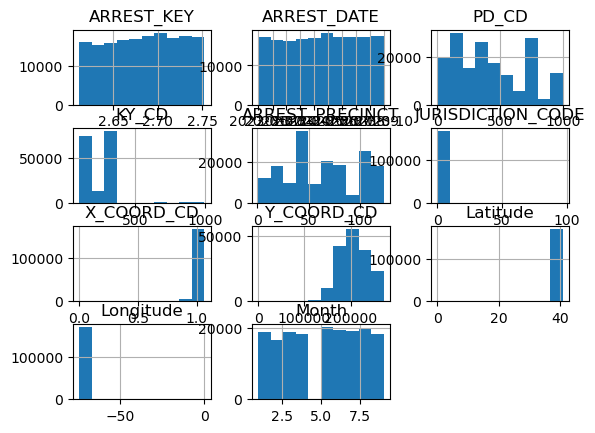

In [38]:
df.hist()

In [39]:
#To group by LAW_CAT_CD, a field in the NYPD arrest file that indicates the level of offense: felony, misdemeanor, 
#violation or infraction. It is based on the New York State Penal Law definitions
df.groupby (['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False)
#There are 93K misdemeanors representing 53% of all the arrests


LAW_CAT_CD
M    93347
F    73866
V      973
9      459
I      193
Name: ARREST_KEY, dtype: int64

In [40]:
#To group the arrests by borough. Brooklyn is the borough with more arrests 27.5%, followed by: the Bronx 23.5%, 
#Manhattan 23.3%, Queens 21.3% and lastly Staten Island 4.4% 
df.groupby (['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_BORO
K    46825
B    39957
M    39652
Q    36246
S     7415
Name: ARREST_KEY, dtype: int64

In [41]:
#To group by precinct
df.groupby (['ARREST_PRECINCT'])['ARREST_KEY'].count().sort_values(ascending=False)

ARREST_PRECINCT
14     5817
75     5469
44     5407
40     5392
103    4582
       ... 
100     873
123     773
17      769
111     659
22       68
Name: ARREST_KEY, Length: 77, dtype: int64

In [42]:
#To group by age group. It is led by the 25-44 age group with 57.4% and followed by: 45-64 with 19.6% and 18-24 with 17.7%.
#The top three age categories concentrate 94% of the arrests 
#Age bracket defined with bias. 25-44 = 19 years, 45-64 = 19 years, 18-24 = 6 years
df.groupby (['AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False)

AGE_GROUP
25-44    97601
45-64    33416
18-24    30036
<18       6245
65+       2797
Name: ARREST_KEY, dtype: int64

In [43]:
#To group by gender. Males represent 80.9%
df.groupby (['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

PERP_SEX
M    137574
F     29018
U      3503
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='PERP_RACE'>

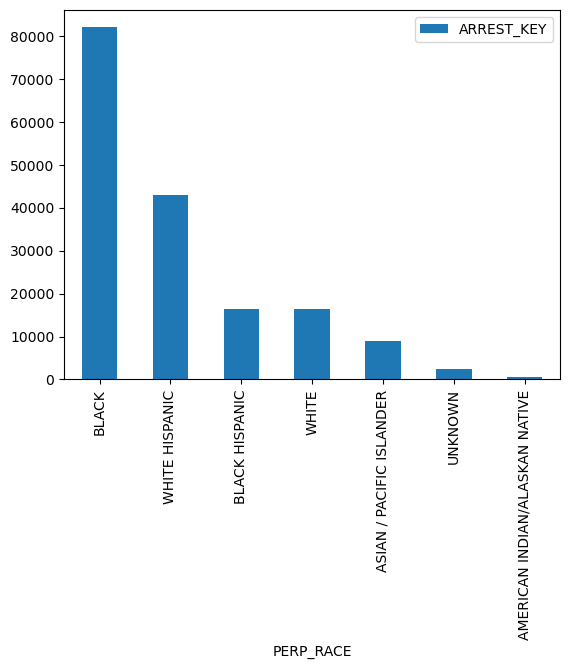

In [44]:
#To group by race. 
df.groupby (['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).sort_values (ascending = False).plot (kind ='bar', legend =True)


In [45]:
#To group by race. Blacks lead the arrests 48.2% and are nearly double of white hispanics.
# I do not understand why the hispanics are segregated between white and black. There could be another bias.
df.groupby (['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False).sort_values (ascending = False)

PERP_RACE
BLACK                             82041
WHITE HISPANIC                    43081
BLACK HISPANIC                    16501
WHITE                             16373
ASIAN / PACIFIC ISLANDER           9066
UNKNOWN                            2481
AMERICAN INDIAN/ALASKAN NATIVE      552
Name: ARREST_KEY, dtype: int64

<Axes: xlabel='OFNS_DESC'>

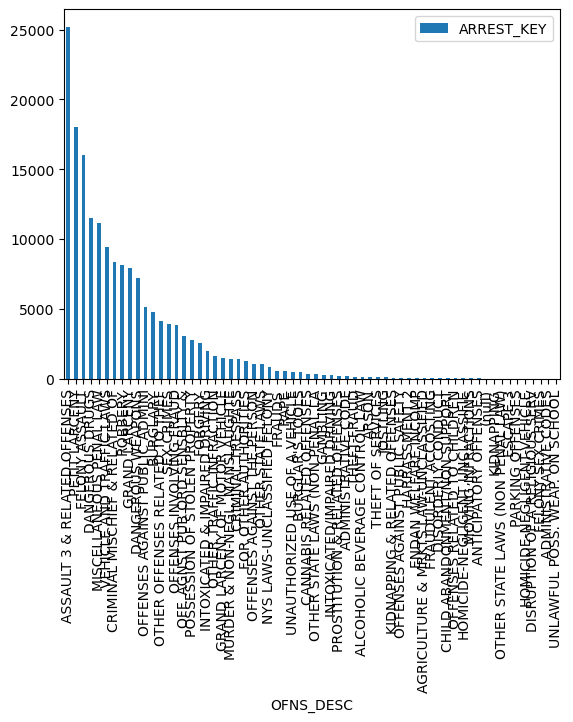

In [46]:
#To group by offense description. There are way too many categories to represent in the chart. 
#Assault on 3rd degree and related offenses are the highest offense with 25K (14.8%)
df.groupby (['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False).sort_values (ascending = False).plot (kind ='bar', legend =True)


In [47]:
result = df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False) # group by offense description and count arrest keys
result = result.to_frame() # convert to DataFrame
display(result) # show the full output

,ARREST_KEY
OFNS_DESC,
ASSAULT 3 & RELATED OFFENSES,25200
PETIT LARCENY,18025
FELONY ASSAULT,16030
DANGEROUS DRUGS,11526
MISCELLANEOUS PENAL LAW,11132
...,...
HOMICIDE-NEGLIGENT-VEHICLE,2
DISRUPTION OF A RELIGIOUS SERV,2
FELONY SEX CRIMES,2


In [48]:
pd.set_option("display.max_rows", None) # show all rows
pd.set_option("display.max_colwidth", None) # show full column width
# group by offense description and count arrest keys
result = df.groupby(['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False) 
total = result.sum()
# print the output
print (result)
print (f"\nTotal: {total}")



OFNS_DESC
ASSAULT 3 & RELATED OFFENSES            25200
PETIT LARCENY                           18025
FELONY ASSAULT                          16030
DANGEROUS DRUGS                         11526
MISCELLANEOUS PENAL LAW                 11132
VEHICLE AND TRAFFIC LAWS                 9442
CRIMINAL MISCHIEF & RELATED OF           8333
ROBBERY                                  8169
GRAND LARCENY                            7901
DANGEROUS WEAPONS                        7245
OFFENSES AGAINST PUBLIC ADMINI           5148
BURGLARY                                 4753
OTHER OFFENSES RELATED TO THEF           4123
SEX CRIMES                               3901
OFFENSES INVOLVING FRAUD                 3846
OFF. AGNST PUB ORD SENSBLTY &            3044
POSSESSION OF STOLEN PROPERTY            2738
FORGERY                                  2591
INTOXICATED & IMPAIRED DRIVING           1953
OTHER TRAFFIC INFRACTION                 1615
GRAND LARCENY OF MOTOR VEHICLE           1470
MURDER & NON-NEGL. MANSL

In [49]:
# select the first 20 rows of the offense description gather 92.13% 
top_20 = result.iloc[:20]
total = top_20.sum()
Percentage=(top_20.sum()/170095)*100
# print the output
print (top_20)
print (f"\nTotal: {total}")
# f-string, which is a formatted string literal that allows you to embed expressions inside curly braces.
#This will print the same output as the previous example, but without the need to use the str() function or the + operator.
#You can also specify the number of decimal places you want to display by using a colon and a format specifier inside 
#the curly braces
print(f'The top 20 Offenses represent {Percentage:.2f} %')



OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
OFFENSES AGAINST PUBLIC ADMINI     5148
BURGLARY                           4753
OTHER OFFENSES RELATED TO THEF     4123
SEX CRIMES                         3901
OFFENSES INVOLVING FRAUD           3846
OFF. AGNST PUB ORD SENSBLTY &      3044
POSSESSION OF STOLEN PROPERTY      2738
FORGERY                            2591
INTOXICATED & IMPAIRED DRIVING     1953
OTHER TRAFFIC INFRACTION           1615
Name: ARREST_KEY, dtype: int64

Total: 156715
The top 20 Offenses represent 92.13 %


<Axes: xlabel='OFNS_DESC'>

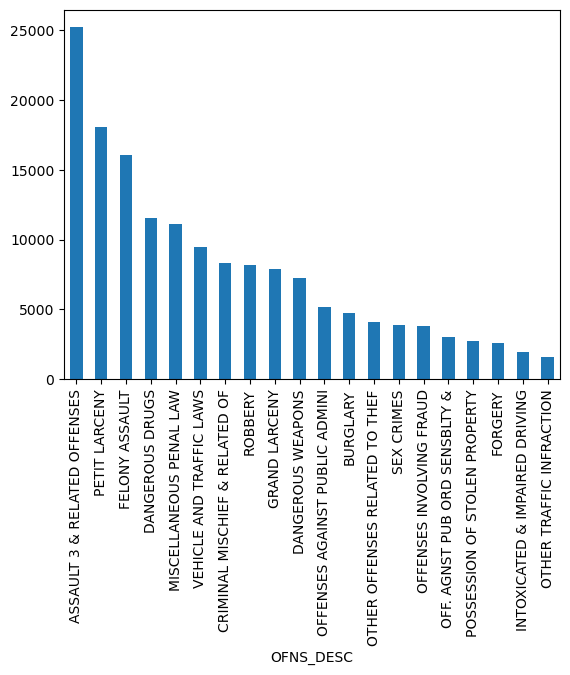

In [50]:
top_20.plot (kind='bar')

In [51]:
# select the first 15 rows of the offense description gather 85.11% 
top_15 = result.iloc[:15]
total = top_15.sum()
Percentage=(top_15.sum()/170095)*100
# print the output
print (top_15)
print (f"\nTotal: {total}")
print(f'The top 15 Offenses represent {Percentage:.2f} %')

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
FELONY ASSAULT                    16030
DANGEROUS DRUGS                   11526
MISCELLANEOUS PENAL LAW           11132
VEHICLE AND TRAFFIC LAWS           9442
CRIMINAL MISCHIEF & RELATED OF     8333
ROBBERY                            8169
GRAND LARCENY                      7901
DANGEROUS WEAPONS                  7245
OFFENSES AGAINST PUBLIC ADMINI     5148
BURGLARY                           4753
OTHER OFFENSES RELATED TO THEF     4123
SEX CRIMES                         3901
OFFENSES INVOLVING FRAUD           3846
Name: ARREST_KEY, dtype: int64

Total: 144774
The top 15 Offenses represent 85.11 %


# Cleaning Tasks

I will create another data frame with only the columns which I will consider for my analysis: 'ARREST_KEY', 'ARREST_DATE',
'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'
    
The LAW_CAT_CD column in the NYC arrests file indicates the level of offense: felony, misdemeanor, violation, or 
infraction [1]. The code 9 means infraction, which is a minor offense that is not punishable by imprisonment [2]. 
Infractions are usually handled by fines or other civil penalties. Some examples of infractions are traffic violations,
littering, or noise complaints [3].

Sources: [1] Opendatanetwork.com, [2] data.cityofnewyork.us, [3] nyc.gov

In [52]:
#Create a new data frame with the columns I am interested to see.
df2= df[['ARREST_KEY', 'ARREST_DATE', 'OFNS_DESC',
        'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE','Month']]

In [53]:
df2.shape

(170095, 11)

In [54]:
# I will filter the rows containing the top 15 offenses which equal to 85.11% of all the offenses, like the Paretto Law 
# where 20% of the values  represent 80% of the results

# Create a list of the values to filter by
ofns_values = ["ASSAULT 3 & RELATED OFFENSES", "PETIT LARCENY", "FELONY ASSAULT", "DANGEROUS DRUGS", 
               "MISCELLANEOUS PENAL LAW", "VEHICLE AND TRAFFIC LAWS", "CRIMINAL MISCHIEF & RELATED OF", 
               "ROBBERY", "GRAND LARCENY", "DANGEROUS WEAPONS", "OFFENSES AGAINST PUBLIC ADMINI", "BURGLARY", 
               "OTHER OFFENSES RELATED TO THEF", "SEX CRIMES", "OFFENSES INVOLVING FRAUD"]

# Filter the rows of the data frame by matching the OFNS_DESC
filtered_df = df2[df2["OFNS_DESC"].isin(ofns_values)]

In [55]:
filtered_df.shape

(144774, 11)

In [56]:
#Checking to see missing data of the filtered data frame. There are none.
filtered_df.isnull().sum()

ARREST_KEY           0
ARREST_DATE          0
OFNS_DESC            0
LAW_CAT_CD           0
ARREST_BORO          0
ARREST_PRECINCT      0
JURISDICTION_CODE    0
AGE_GROUP            0
PERP_SEX             0
PERP_RACE            0
Month                0
dtype: int64

In [57]:
#To group by the law categories of the new data frame
result1= filtered_df.groupby (['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False)
total1 = result1.sum()
# print the output
print (result1)
print (f"\nTotal: {total1}")


LAW_CAT_CD
M    80329
F    64334
V      106
I        4
9        1
Name: ARREST_KEY, dtype: int64

Total: 144774


In [58]:
# Create a dictionary of the values to replace. I will group 9 and I under infractions.
law_values = {"M": "misdemeanor", "F": "felony", "V": "violation", "I": "infraction", "9": "infraction"}

# Replace the values in the LAW_CAT_CD column
filtered_df["LAW_CAT_CD"] = filtered_df["LAW_CAT_CD"].replace(law_values)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_26700\3257889584.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["LAW_CAT_CD"] = filtered_df["LAW_CAT_CD"].replace(law_values)


In [59]:
filtered_df.head(10)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,261209118,2023-01-01,FELONY ASSAULT,felony,K,77,0,45-64,F,BLACK,1
1,262984267,2023-02-03,DANGEROUS DRUGS,felony,K,73,0,25-44,M,BLACK,2
2,263664549,2023-02-15,FELONY ASSAULT,felony,K,62,0,25-44,M,WHITE,2
3,261345231,2023-01-04,FELONY ASSAULT,felony,M,32,0,25-44,M,BLACK,1
4,263536618,2023-02-13,FELONY ASSAULT,felony,K,71,0,25-44,M,BLACK,2
5,262030390,2023-01-17,FELONY ASSAULT,felony,Q,113,0,45-64,F,BLACK,1
6,262362214,2023-01-23,FELONY ASSAULT,felony,M,32,0,25-44,M,BLACK,1
9,265281035,2023-03-17,BURGLARY,felony,M,24,0,45-64,M,BLACK,3
11,262906326,2023-02-02,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Q,108,0,<18,M,BLACK,2
12,263347526,2023-02-09,ROBBERY,felony,B,43,0,25-44,F,BLACK,2


In [60]:
#To check that the names were replaced.
result2= filtered_df.groupby (['LAW_CAT_CD'])['ARREST_KEY'].count().sort_values(ascending=False)
total2 = result1.sum()
# print the output
print (result2)
print (f"\nTotal: {total2}")

LAW_CAT_CD
misdemeanor    80329
felony         64334
violation        106
infraction         5
Name: ARREST_KEY, dtype: int64

Total: 144774


In [61]:
# Create a dictionary of the Borough values to replace
Boro_values = {"B": "Bronx", "K": "Brooklyn", "M": "Manhattan", "Q": "Queens", "S": "Staten Island"}

# Replace the values in the Arrest_Boro column
filtered_df["ARREST_BORO"] = filtered_df["ARREST_BORO"].replace(Boro_values)

C:\Users\Marcelo\AppData\Local\Temp\ipykernel_26700\3134219116.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["ARREST_BORO"] = filtered_df["ARREST_BORO"].replace(Boro_values)


In [62]:
filtered_df.head(10)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,261209118,2023-01-01,FELONY ASSAULT,felony,Brooklyn,77,0,45-64,F,BLACK,1
1,262984267,2023-02-03,DANGEROUS DRUGS,felony,Brooklyn,73,0,25-44,M,BLACK,2
2,263664549,2023-02-15,FELONY ASSAULT,felony,Brooklyn,62,0,25-44,M,WHITE,2
3,261345231,2023-01-04,FELONY ASSAULT,felony,Manhattan,32,0,25-44,M,BLACK,1
4,263536618,2023-02-13,FELONY ASSAULT,felony,Brooklyn,71,0,25-44,M,BLACK,2
5,262030390,2023-01-17,FELONY ASSAULT,felony,Queens,113,0,45-64,F,BLACK,1
6,262362214,2023-01-23,FELONY ASSAULT,felony,Manhattan,32,0,25-44,M,BLACK,1
9,265281035,2023-03-17,BURGLARY,felony,Manhattan,24,0,45-64,M,BLACK,3
11,262906326,2023-02-02,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,108,0,<18,M,BLACK,2
12,263347526,2023-02-09,ROBBERY,felony,Bronx,43,0,25-44,F,BLACK,2


In [63]:
#To group by the borough of the new data frame.
result3=filtered_df.groupby (['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

total3 = result3.sum()
# print the output
print (result3)
print (f"\nTotal: {total3}")

ARREST_BORO
Brooklyn         39578
Manhattan        34321
Bronx            34146
Queens           30357
Staten Island     6372
Name: ARREST_KEY, dtype: int64

Total: 144774


In [64]:
#This code uses the pandas library, which is a popular tool for data analysis in Python1. 
#The loc method allows you to select rows and columns by labels or boolean arrays2. 
#The map method applies a function or a dictionary to each element of a Series3. 
#The : in the first argument of the loc method means to select all rows, and the "PERP_SEX" in the second argument means 
#to select the PERP_SEX column. The code then assigns the mapped values to the selected column, effectively replacing 
#the original values.

#1: pandas: powerful Python data analysis toolkit — pandas 2.1.4 documentation 
#2: pandas.DataFrame.loc — pandas 2.1.4 documentation 
#3: pandas.Series.map — pandas 2.1.4 documentation

#Source: stackoverflow.com

# Create a dictionary of the values to replace
perp_sex_values = {"M": "Male", "F": "Female", "U": "Undefined"}

# Use the loc method to access and modify the PERP_SEX column
filtered_df.loc[:, "PERP_SEX"] = filtered_df["PERP_SEX"].map(perp_sex_values)

In [65]:
#To group by gender of the new data frame.
result4=filtered_df.groupby (['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

total4 = result4.sum()
# print the output
print (result4)
print (f"\nTotal: {total4}")

PERP_SEX
Male         115606
Female        26183
Undefined      2985
Name: ARREST_KEY, dtype: int64

Total: 144774


In [66]:
#See what unique values are populating JURISDICTION_CODE. Jurisdiction responsible for arrest. 
#Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
filtered_df ['JURISDICTION_CODE'].unique()

array([ 0,  2,  1, 15, 73, 97, 72, 14, 17,  3, 71, 87, 11,  7,  4,  6, 88,
       51, 13, 69, 85, 52, 74], dtype=int64)

In [67]:
# Create a dictionary of the values and their corresponding names
jurisdiction_values = {0: "Patrol", 1: "Transit", 2: "Housing", 3: "Port Authority", 4: "State Police", 
                       6: "New York State Park Police", 7: "Department of Environmental Conservation", 
                       11: "Triborough Bridge and Tunnel Authority", 13: "Office of Mental Health", 
                       14: "New York State Department of Correctional Services", 15: "Metropolitan Transportation Authority", 
                       17: "New York State Office of Court Administration", 51: "NYC Department of Sanitation", 
                       52: "NYC Department of Transportation", 69: "NYC Department of Finance", 71: "NYC Department of Health", 
                       72: "NYC Department of Buildings", 73: "NYC Department of Environmental Protection",
                       74: "NYC Department of Parks and Recreation", 79: "NYC Department of Homeless Services", 
                       85: "NYC Department of Education", 87: "NYC Human Resources Administration", 
                       88: "NYC Department of Consumer Affairs", 97: "NYC Taxi and Limousine Commission"}

# Use the loc method to access and modify the JURISDICTION_CODE column
filtered_df.loc[:, "JURISDICTION_CODE"] = filtered_df["JURISDICTION_CODE"].map(jurisdiction_values)

In [68]:
filtered_df.head(10)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Month
0,261209118,2023-01-01,FELONY ASSAULT,felony,Brooklyn,77,Patrol,45-64,Female,BLACK,1
1,262984267,2023-02-03,DANGEROUS DRUGS,felony,Brooklyn,73,Patrol,25-44,Male,BLACK,2
2,263664549,2023-02-15,FELONY ASSAULT,felony,Brooklyn,62,Patrol,25-44,Male,WHITE,2
3,261345231,2023-01-04,FELONY ASSAULT,felony,Manhattan,32,Patrol,25-44,Male,BLACK,1
4,263536618,2023-02-13,FELONY ASSAULT,felony,Brooklyn,71,Patrol,25-44,Male,BLACK,2
5,262030390,2023-01-17,FELONY ASSAULT,felony,Queens,113,Patrol,45-64,Female,BLACK,1
6,262362214,2023-01-23,FELONY ASSAULT,felony,Manhattan,32,Patrol,25-44,Male,BLACK,1
9,265281035,2023-03-17,BURGLARY,felony,Manhattan,24,Patrol,45-64,Male,BLACK,3
11,262906326,2023-02-02,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,108,Patrol,<18,Male,BLACK,2
12,263347526,2023-02-09,ROBBERY,felony,Bronx,43,Patrol,25-44,Female,BLACK,2


In [69]:
#To group by jurisdiction of the new data frame.
result5=filtered_df.groupby (['JURISDICTION_CODE'])['ARREST_KEY'].count().sort_values(ascending=False)

total5 = result5.sum()
# print the output
print (result5)
print (f"\nTotal: {total5}")
# The first 4 jurisdiction codes represent 98.63% (142788) of the 100% (144774) records. Patrol is the largest. 


JURISDICTION_CODE
Patrol                                                129942
Transit                                                 6475
Housing                                                 5408
Port Authority                                           963
NYC Taxi and Limousine Commission                        374
NYC Department of Buildings                              368
New York State Office of Court Administration            361
NYC Department of Environmental Protection               240
Metropolitan Transportation Authority                    231
New York State Department of Correctional Services        82
Triborough Bridge and Tunnel Authority                    71
Department of Environmental Conservation                  67
NYC Human Resources Administration                        62
State Police                                              39
NYC Department of Health                                  36
NYC Department of Sanitation                              29
NYC De

A misdemeanor is a type of criminal offense that is less serious than a felony and carries a possible jail sentence of 15 to 364 days in New York1. There are two classes of misdemeanors, class A and B, and a category of unclassified misdemeanors. The specific penalties and examples of each class depend on the law or ordinance that defines the crime1.

In the context of the NYC arrests file, a misdemeanor is any offense that falls under the categories of Penal Law, Vehicle and Traffic Law, or other laws that are not felonies or violations. Some common misdemeanors in the NYC arrests file are petit larceny, assault, drug possession, and driving with a suspended license2.

Source: 1: New York Misdemeanor Crimes by Class and Sentences 2: Misdemeanor New York: Class A, B Misdemeanor Charge NYS

1 criminaldefenselawyer.com
2 ils.ny.gov
3 criminaldefenselawyer.com

In [70]:
#filter for misdemeanor

# Filter the rows of the data frame by matching the OFNS_DESC
filtmisd_df = filtered_df[filtered_df["LAW_CAT_CD"]== "misdemeanor"]

In [71]:
filtmisd_df.shape

(80329, 11)

In [72]:
filtmisd_df.head(10)

,ARREST_KEY,ARREST_DATE,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,Month
11,262906326,2023-02-02,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,108,Patrol,<18,Male,BLACK,2
15,266637010,2023-04-13,PETIT LARCENY,misdemeanor,Manhattan,24,Patrol,25-44,Male,BLACK,4
18,263857243,2023-02-18,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,105,Patrol,18-24,Male,BLACK,2
27,267152152,2023-04-23,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Brooklyn,60,Patrol,25-44,Female,WHITE,4
31,268322401,2023-05-16,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Bronx,52,Patrol,25-44,Male,BLACK,5
46,269249461,2023-06-03,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Manhattan,28,Patrol,18-24,Male,BLACK,6
50,270126322,2023-06-20,PETIT LARCENY,misdemeanor,Bronx,52,Patrol,25-44,Male,BLACK,6
51,274463428,2023-09-14,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,101,Patrol,45-64,Male,WHITE HISPANIC,9
67,271456452,2023-07-17,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Queens,105,Patrol,<18,Female,BLACK,7
76,266086609,2023-04-03,ASSAULT 3 & RELATED OFFENSES,misdemeanor,Bronx,40,Patrol,45-64,Female,BLACK,4


In [73]:
#To see how many arrests due to misdemeanors there were by month, borough, age group, race and sex
#hospitalized by diagnostic 1 code, race and gender 
df6 = filtmisd_df.groupby (['Month','ARREST_BORO','AGE_GROUP','PERP_RACE']) ['ARREST_KEY'].count().sort_values(ascending=False)
total6 = df6.sum()
print (df6)
print (f"\nTotal: {total6}")


Month  ARREST_BORO    AGE_GROUP  PERP_RACE                     
5      Brooklyn       25-44      BLACK                             785
1      Brooklyn       25-44      BLACK                             773
3      Brooklyn       25-44      BLACK                             760
8      Brooklyn       25-44      BLACK                             754
4      Brooklyn       25-44      BLACK                             752
2      Brooklyn       25-44      BLACK                             738
6      Brooklyn       25-44      BLACK                             736
7      Brooklyn       25-44      BLACK                             705
9      Brooklyn       25-44      BLACK                             681
6      Bronx          25-44      BLACK                             648
1      Bronx          25-44      BLACK                             646
8      Manhattan      25-44      BLACK                             641
5      Bronx          25-44      BLACK                             633
7      Manhat

In [74]:
# To see the arrests by borough in the new data frame filtered by misdemeanor
result7=filtmisd_df.groupby (['ARREST_BORO'])['ARREST_KEY'].count().sort_values(ascending=False)

total7 = result7.sum()
# print the output
print (result7)
print (f"\nTotal: {total7}")

ARREST_BORO
Brooklyn         20493
Bronx            20260
Manhattan        19637
Queens           16467
Staten Island     3472
Name: ARREST_KEY, dtype: int64

Total: 80329


In [75]:
# To see the arrests by gender in the new data frame filtered by misdemeanor
result8=filtmisd_df.groupby (['PERP_SEX'])['ARREST_KEY'].count().sort_values(ascending=False)

total8 = result8.sum()
# print the output
print (result8)
print (f"\nTotal: {total8}")

PERP_SEX
Male         62796
Female       15578
Undefined     1955
Name: ARREST_KEY, dtype: int64

Total: 80329


In [76]:
# To see the arrests by month in the new data frame filtered by misdemeanor
result9=filtmisd_df.groupby (['Month'])['ARREST_KEY'].count()
total9 = result9.sum()
# print the output
print (result9)
print (f"\nTotal: {total9}")

Month
1    8917
2    8043
3    8990
4    8606
5    9639
6    9254
7    8943
8    9279
9    8658
Name: ARREST_KEY, dtype: int64

Total: 80329


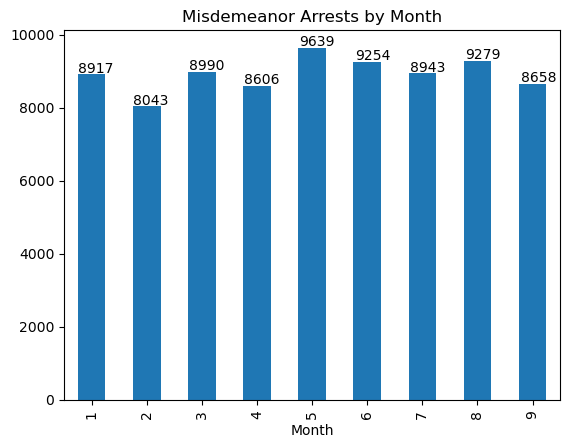

In [77]:
#Create a bar chart to show the arrests by month

ax=result9.plot(kind='bar', x='Month', y='ARREST_KEY')
ax.set_title("Misdemeanor Arrests by Month")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()



In [78]:
#to perform some statistics of the number of arrests by month
result9.describe()

count       9.000000
mean     8925.444444
std       460.833243
min      8043.000000
25%      8658.000000
50%      8943.000000
75%      9254.000000
max      9639.000000
Name: ARREST_KEY, dtype: float64

In [79]:
#To see what were the major offenses of misdemeanors
result10=filtmisd_df.groupby (['OFNS_DESC'])['ARREST_KEY'].count().sort_values(ascending=False)
total10 = result10.sum()
# print the output
print (result10)
print (f"\nTotal: {total10}")

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES      25200
PETIT LARCENY                     18025
VEHICLE AND TRAFFIC LAWS           9238
DANGEROUS DRUGS                    5306
OFFENSES AGAINST PUBLIC ADMINI     5148
OTHER OFFENSES RELATED TO THEF     4123
CRIMINAL MISCHIEF & RELATED OF     3957
OFFENSES INVOLVING FRAUD           3846
SEX CRIMES                         3387
DANGEROUS WEAPONS                  2099
Name: ARREST_KEY, dtype: int64

Total: 80329


In [80]:
#to see the number of arrests by age 
result11=filtmisd_df.groupby (['AGE_GROUP'])['ARREST_KEY'].count().sort_values(ascending=False)
total11 = result11.sum()
# print the output
print (result11)
print (f"\nTotal: {total11}")

AGE_GROUP
25-44    47027
45-64    17348
18-24    13073
65+       1466
<18       1415
Name: ARREST_KEY, dtype: int64

Total: 80329


In [81]:
#to see the number of arrests by jurisdiction. More than 87% of the arrests were carried out on patrol
result13=filtmisd_df.groupby (['JURISDICTION_CODE'])['ARREST_KEY'].count().sort_values(ascending=False)
total13 = result11.sum()
# print the output
print (result13)
print (f"\nTotal: {total13}")

JURISDICTION_CODE
Patrol                                                70205
Transit                                                5023
Housing                                                3306
Port Authority                                          671
New York State Office of Court Administration           275
NYC Taxi and Limousine Commission                       223
NYC Department of Buildings                             202
Metropolitan Transportation Authority                   173
NYC Department of Environmental Protection               52
Department of Environmental Conservation                 45
State Police                                             37
Triborough Bridge and Tunnel Authority                   33
New York State Department of Correctional Services       31
NYC Department of Sanitation                             21
NYC Department of Health                                 13
NYC Human Resources Administration                        4
NYC Department of Cons

In [82]:
#To look at the arrests from a race perspective. 
result14=filtmisd_df.groupby (['PERP_RACE'])['ARREST_KEY'].count().sort_values(ascending=False)
total14 = result14.sum()
# print the output
print (result14)
print (f"\nTotal: {total14}")

PERP_RACE
BLACK                             37531
WHITE HISPANIC                    20953
WHITE                              8471
BLACK HISPANIC                     7768
ASIAN / PACIFIC ISLANDER           4085
UNKNOWN                            1249
AMERICAN INDIAN/ALASKAN NATIVE      272
Name: ARREST_KEY, dtype: int64

Total: 80329


In [83]:
result14.describe()

count        7.000000
mean     11475.571429
std      13392.808193
min        272.000000
25%       2667.000000
50%       7768.000000
75%      14712.000000
max      37531.000000
Name: ARREST_KEY, dtype: float64

<Axes: xlabel='Month', ylabel='Count'>

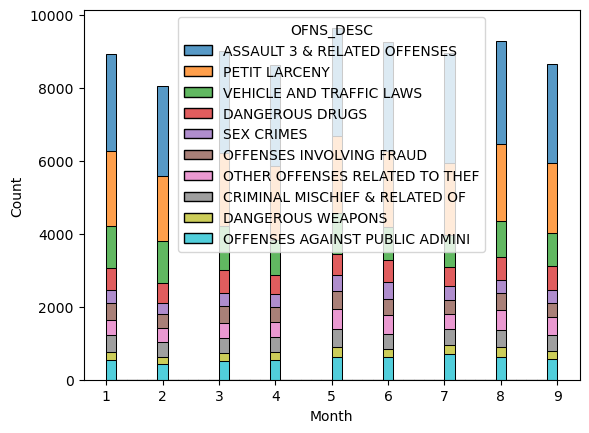

In [84]:
#To plot offense descriptions per month
sns.histplot(data=filtmisd_df, x="Month", hue="OFNS_DESC", multiple="stack")

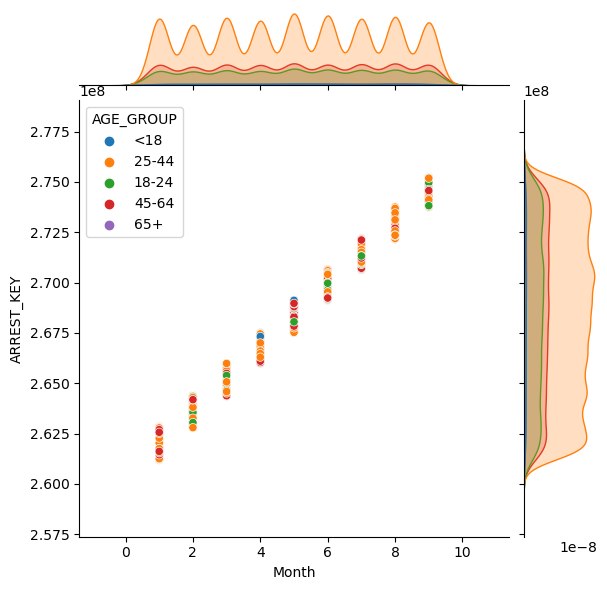

In [85]:
#To plot the arrests by age group per month
sns.jointplot(data=filtmisd_df, x="Month", y="ARREST_KEY", hue="AGE_GROUP")

In [86]:
#To show the data in a pivot form
# filter the dataframe by OFNS_DESC
filtmisd_df = filtmisd_df[(filtmisd_df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') & (filtmisd_df['AGE_GROUP'] == '25-44')]

# group by the other columns and aggregate by count
table = filtmisd_df.groupby(['ARREST_BORO','PERP_RACE']).agg({'ARREST_KEY':'count'})

# display the table
print(table)



                                              ARREST_KEY
ARREST_BORO   PERP_RACE                                 
Bronx         AMERICAN INDIAN/ALASKAN NATIVE           9
              ASIAN / PACIFIC ISLANDER                64
              BLACK                                 1863
              BLACK HISPANIC                         668
              UNKNOWN                                 59
              WHITE                                   97
              WHITE HISPANIC                        1155
Brooklyn      AMERICAN INDIAN/ALASKAN NATIVE          15
              ASIAN / PACIFIC ISLANDER               166
              BLACK                                 2230
              BLACK HISPANIC                         244
              UNKNOWN                                 48
              WHITE                                  345
              WHITE HISPANIC                         853
Manhattan     AMERICAN INDIAN/ALASKAN NATIVE          15
              ASIAN / PACIFIC I

In [87]:
#Here I tried to show the data in a pivot form and the trend per month. I have got NaN values which I tried to replace with
#the median but does not seem to have worked
# filter the dataframe by OFNS_DESC and AGE_GROUP
filtmisd_df = filtmisd_df[(filtmisd_df['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES') & (filtmisd_df['AGE_GROUP'] == '25-44')]
# create a pivot table with months as columns and count as values
table = filtmisd_df.pivot_table(values='ARREST_KEY', index=['ARREST_BORO','PERP_RACE'], columns='Month', aggfunc='count')
# fill the NaN values with the median value of each column
table = table.fillna(table.median(axis=1))
# display the pivot table
table

Month                                             1      2      3      4  \
ARREST_BORO   PERP_RACE                                                    
Bronx         AMERICAN INDIAN/ALASKAN NATIVE    1.0    1.0    1.0    1.0   
              ASIAN / PACIFIC ISLANDER          6.0    5.0    3.0    5.0   
              BLACK                           188.0  223.0  201.0  186.0   
              BLACK HISPANIC                   71.0   56.0   85.0   61.0   
              UNKNOWN                           1.0    2.0    7.0   14.0   
              WHITE                             9.0    6.0    9.0    7.0   
              WHITE HISPANIC                  125.0  116.0  139.0  129.0   
Brooklyn      AMERICAN INDIAN/ALASKAN NATIVE    2.0    3.0    NaN    2.0   
              ASIAN / PACIFIC ISLANDER         16.0   11.0   14.0   16.0   
              BLACK                           259.0  235.0  244.0  244.0   
              BLACK HISPANIC                   18.0   16.0   26.0   36.0   
              UNKNOWN                           NaN    NaN    5.0    4.0   
              WHITE                            47.0   31.0   31.0   27.0   
              WHITE HISPANIC                   79.0   77.0  111.0   84.0   
Manhattan     AMERICAN INDIAN/ALASKAN NATIVE    1.0    1.0    3.0    1.0   
              ASIAN / PACIFIC ISLANDER         11.0   10.0   11.0    9.0   
              BLACK                           142.0  155.0  170.0  154.0   
              BLACK HISPANIC                   30.0   29.0   34.0   35.0   
              UNKNOWN                           1.0    2.0    4.0   11.0   
              WHITE                            26.0   19.0   41.0   29.0   
              WHITE HISPANIC                   79.0   55.0   80.0   93.0   
Queens        AMERICAN INDIAN/ALASKAN NATIVE    2.0    2.0    2.0    1.0   
              ASIAN / PACIFIC ISLANDER         59.0   41.0   56.0   49.0   
              BLACK                           125.0  124.0  108.0  130.0   
              BLACK HISPANIC                   12.0   22.0   23.0   11.0   
              UNKNOWN                           1.0    1.0    7.0    9.0   
              WHITE                            20.0   29.0   29.0   25.0   
              WHITE HISPANIC                  136.0  106.0  127.0  162.0   
Staten Island AMERICAN INDIAN/ALASKAN NATIVE    NaN    NaN    NaN    1.0   
              ASIAN / PACIFIC ISLANDER          3.0    3.0    1.0    2.0   
              BLACK                            19.0   15.0   21.0   20.0   
              BLACK HISPANIC                    6.0    NaN    4.0    3.0   
              UNKNOWN                           NaN    NaN    2.0    NaN   
              WHITE                             7.0   11.0    9.0   19.0   
              WHITE HISPANIC                   12.0   15.0   11.0   15.0   

Month                                             5      6      7      8  \
ARREST_BORO   PERP_RACE                                                    
Bronx         AMERICAN INDIAN/ALASKAN NATIVE    2.0    NaN    1.0    1.0   
              ASIAN / PACIFIC ISLANDER         14.0   13.0    4.0    7.0   
              BLACK                           214.0  208.0  236.0  197.0   
              BLACK HISPANIC                   66.0   84.0   88.0   82.0   
              UNKNOWN                          10.0    8.0   11.0    1.0   
              WHITE                            13.0   11.0   14.0   14.0   
              WHITE HISPANIC                  143.0  120.0  132.0  132.0   
Brooklyn      AMERICAN INDIAN/ALASKAN NATIVE    NaN    1.0    4.0    1.0   
              ASIAN / PACIFIC ISLANDER         17.0   27.0   19.0   21.0   
              BLACK                           259.0  246.0  266.0  252.0   
              BLACK HISPANIC                   29.0   30.0   35.0   33.0   
              UNKNOWN                          16.0   11.0   11.0    NaN   
              WHITE                            39.0   35.0   45.0   46.0   
              WHITE HISPANIC                  1

<Axes: xlabel='Month', ylabel='ARREST_BORO-OFNS_DESC'>

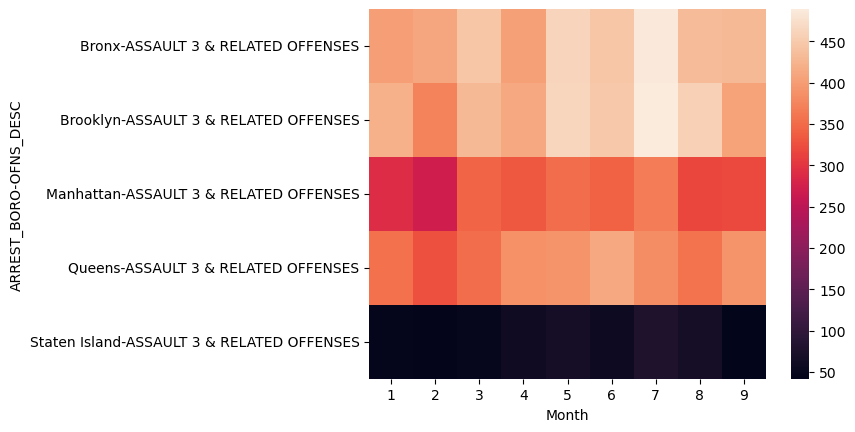

In [88]:
# create a pivot table with months as columns and count as values. Replaced NaN with zeros
table = filtmisd_df.pivot_table(values='ARREST_KEY', index=['ARREST_BORO','OFNS_DESC'], columns='Month', aggfunc='count',fill_value=0)

#To show a heatmap of the Assault 3rd degree and related offenses by borough per month
# create a heatmap from the pivot table with the "rocket" colormap
sns.heatmap(table, cmap="rocket")



<Axes: xlabel='Month'>

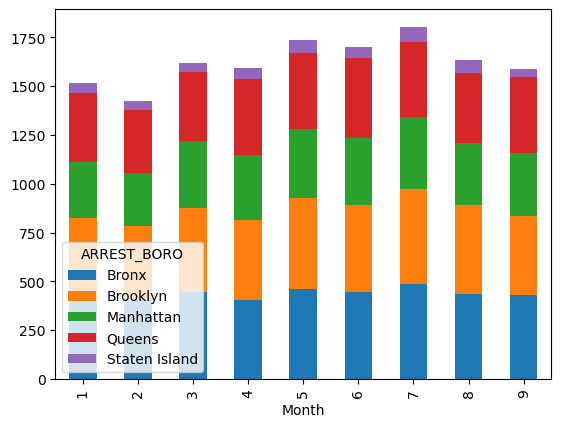

In [89]:
# create a pivot table with months as columns and count as values
table = filtmisd_df.pivot_table(values='ARREST_KEY', index=['Month'], columns='ARREST_BORO', aggfunc='count')

# create a stacked bar chart from the pivot table
table.plot(kind='bar', stacked=True)

<Axes: xlabel='Month'>

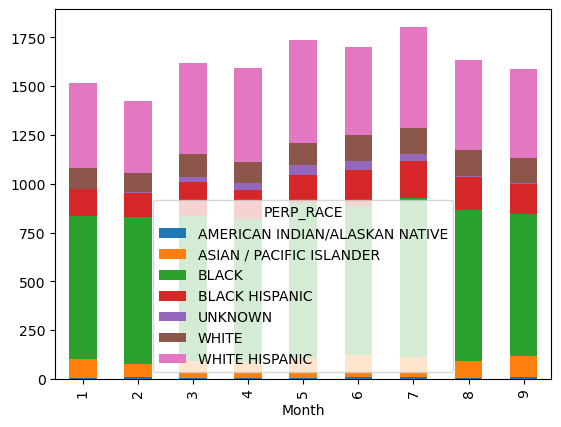

In [90]:
# create a pivot table with months as columns and count as values
table = filtmisd_df.pivot_table(values='ARREST_KEY', index=['Month'], columns='PERP_RACE', aggfunc='count')

# create a stacked bar chart from the pivot table
table.plot(kind='bar', stacked=True)

# Conclusion

Misdemeanors accounted for roughly 55% (93347) of the criminal offenses contained in this this file. Even when I ranked the top 15 offenses, the number
of misdemeanors represented 86% of this category (80329/93347). Looking at the distribution by borough, Brooklyn led with 20493 arrests (25.5%) 
closely followed by the Bronx 20260 (25.2%), Manhattan 19637 (24.4%) and Queens 16647 (20.4%). The median of arrests per month was
8943 while the mean was 8925. The highest number of arrests related to this was occurred in May with 9639 narrowly followed by August and June.
Assault on third degree and related offenses was the largest offense type within misdemeanors with 25200 arrests YTD. 
The age group with more arrests was the 25-44 age group largey composed by black and white hispanics males. 
The other fact that caught my eye was that the largest jusrisdiction was driven by patrol with over 70k arrests.
I may be introducing some bias when looking at this data because there were some values missing for law category 168838 records over 170095 to start with
and then I may be introducing some other noise when slicing and dicing the information or replacing the NaNs. That is not to mention how the age groups were defined that do not seem to be evenly split.
Finally, I did not understand why Hispanics were further split between white and black.
